In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [2]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [3]:
print("--- 1. Data Acquisition and Loading ---")

try:
    # Ensure 'train.csv' is in the same directory as your Jupyter Notebook
    df = pd.read_csv('train.csv')
    print("Dataset 'train.csv' loaded successfully!")
except FileNotFoundError:
    print("Error: train.csv not found. Please make sure the file is in the same directory as your notebook.")
    exit()

print("\nFirst 5 rows of the dataset:")
print(df.head())


--- 1. Data Acquisition and Loading ---
Dataset 'train.csv' loaded successfully!

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [4]:
print("\n--- 2. Exploratory Data Analysis (EDA) ---")

# 2.1 Initial Data Inspection
print("\n2.1 Initial Data Inspection:")
print("\nDataset Information:")
df.info()


--- 2. Exploratory Data Analysis (EDA) ---

2.1 Initial Data Inspection:

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())


Descriptive Statistics for Numerical Features:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
print("\nShape of the dataset (rows, columns):")
print(df.shape)


Shape of the dataset (rows, columns):
(891, 12)


In [7]:
print("\n2.2 Missing Values Analysis:")
print("\nMissing Values Count per Column:")
print(df.isnull().sum())


2.2 Missing Values Analysis:

Missing Values Count per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
print("\nPercentage of Missing Values per Column:")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage.sort_values(ascending=False))


Percentage of Missing Values per Column:
Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64


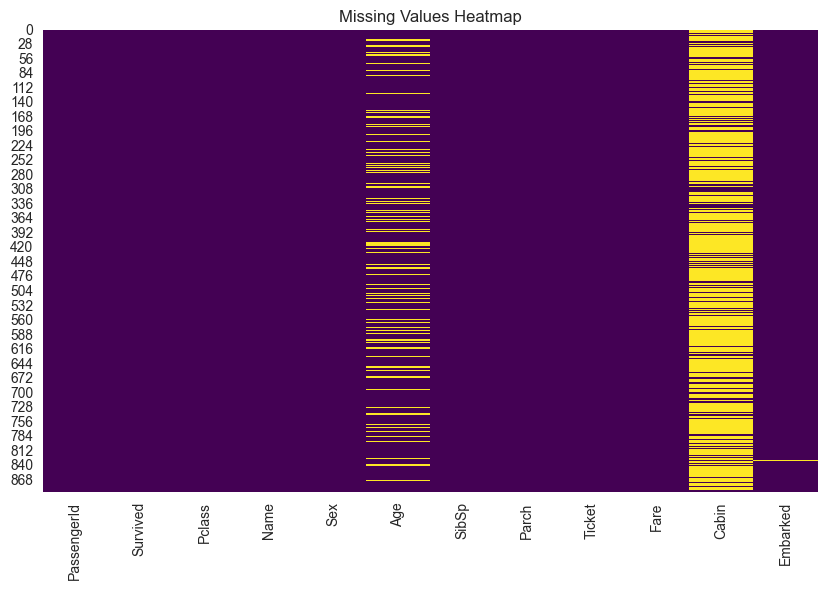

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


2.3 Distribution Analysis (Univariate):


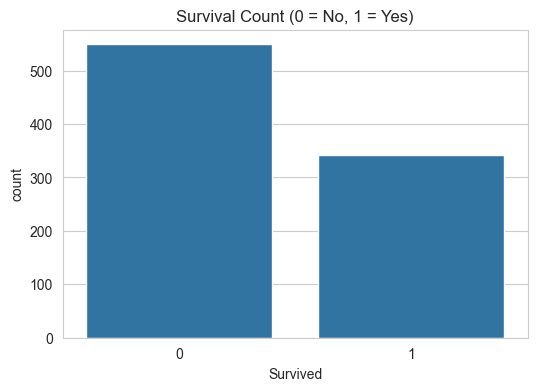

Survival Counts and Proportions:
 Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [10]:
print("\n2.3 Distribution Analysis (Univariate):")
# Distribution of 'Survived' (Target Variable)
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()
print("Survival Counts and Proportions:\n", df['Survived'].value_counts(normalize=True))

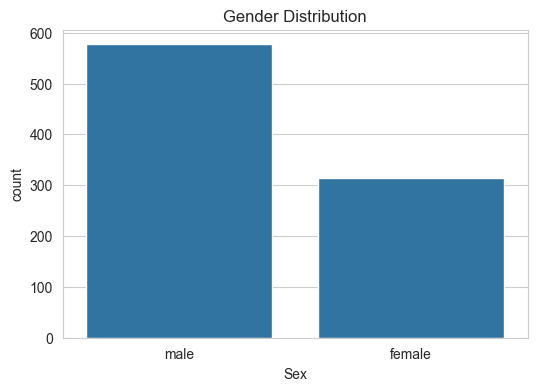

Gender Counts and Proportions:
 Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64


In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()
print("Gender Counts and Proportions:\n", df['Sex'].value_counts(normalize=True))

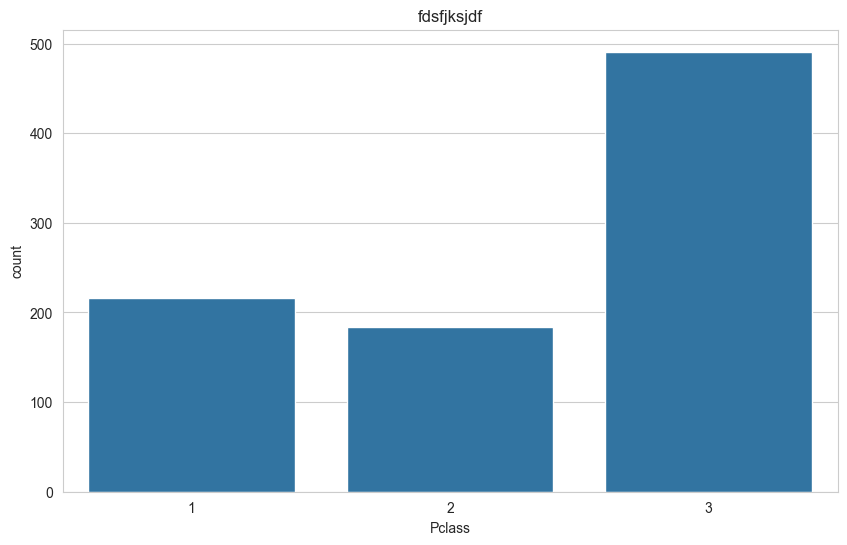

distribution:  Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64


In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass', data=df)
plt.title("fdsfjksjdf")
plt.show()
print("distribution: ",df['Pclass'].value_counts(normalize=True))

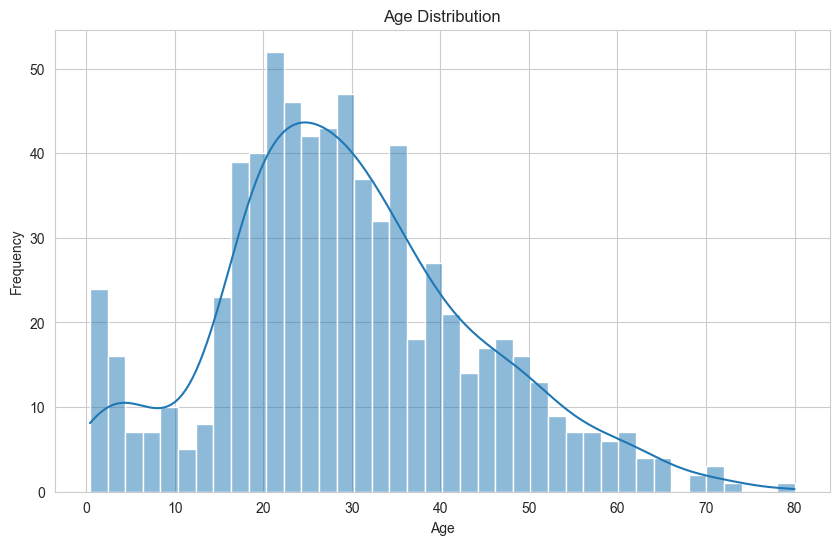

In [13]:
# Distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=40, kde=True) # dropna to exclude missing values for plotting
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

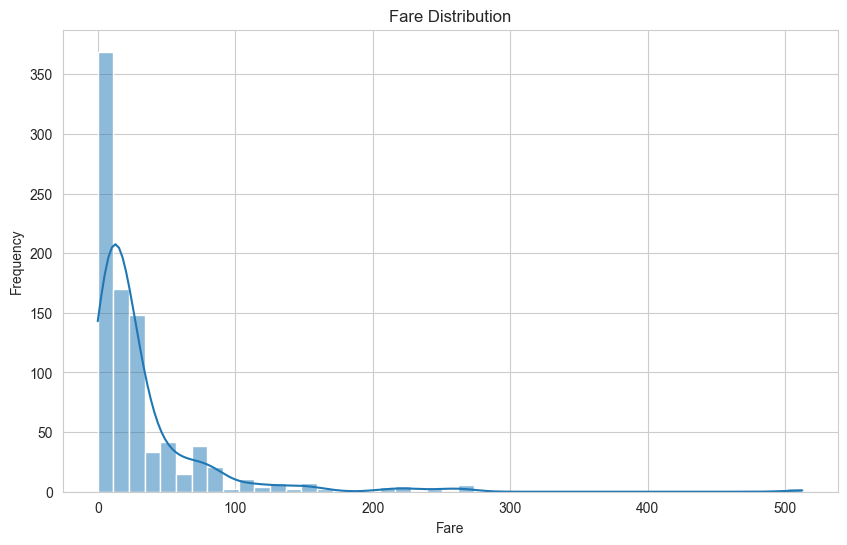

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=45, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()



2.4 Correlation Analysis (Bivariate and Multivariate):


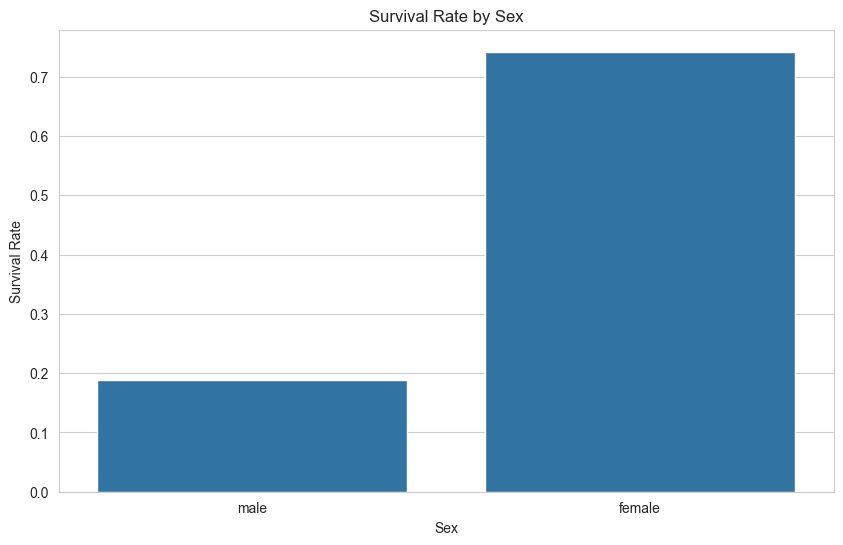

In [15]:
print("\n2.4 Correlation Analysis (Bivariate and Multivariate):")
# Survival Rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

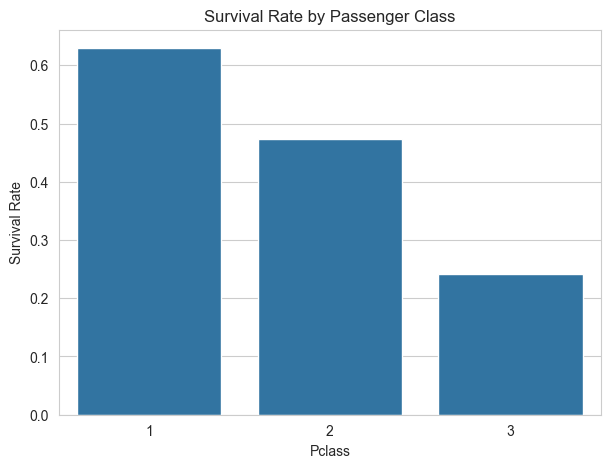

In [16]:
# Survival Rate by Pclass
plt.figure(figsize=(7, 5))
sns.barplot(x='Pclass', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

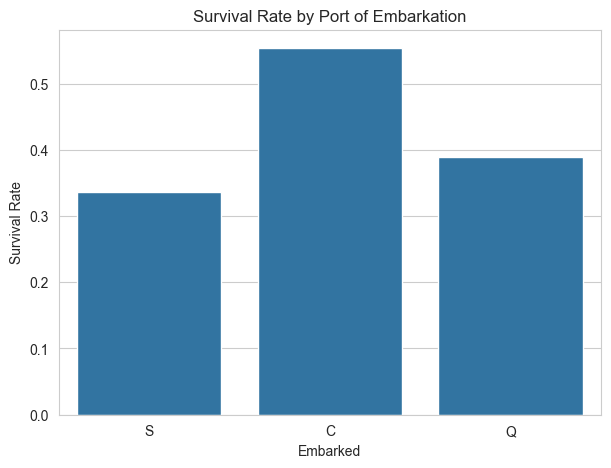

In [17]:
plt.figure(figsize=(7, 5))
sns.barplot(x='Embarked', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

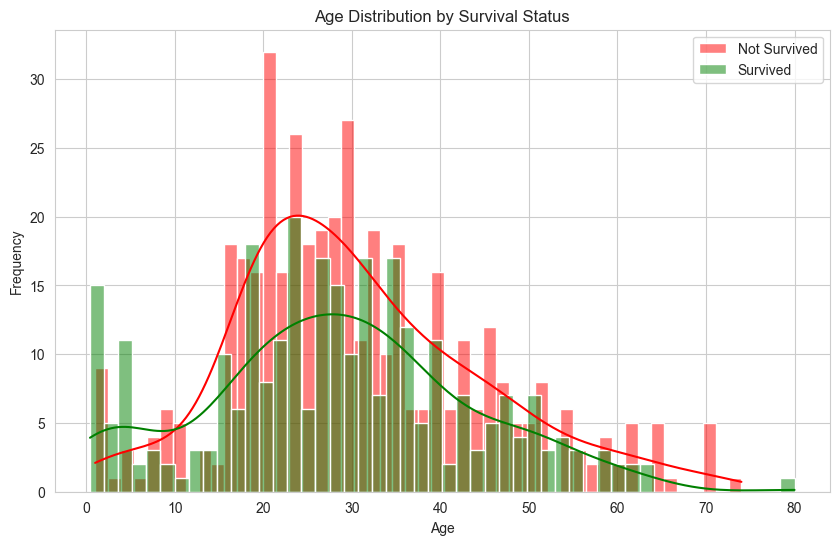

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived'] == 0]['Age'].dropna(), bins=50, kde=True, color='red', label='Not Survived')
sns.histplot(df[df['Survived'] == 1]['Age'].dropna(), bins=50, kde=True, color='green', label='Survived')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

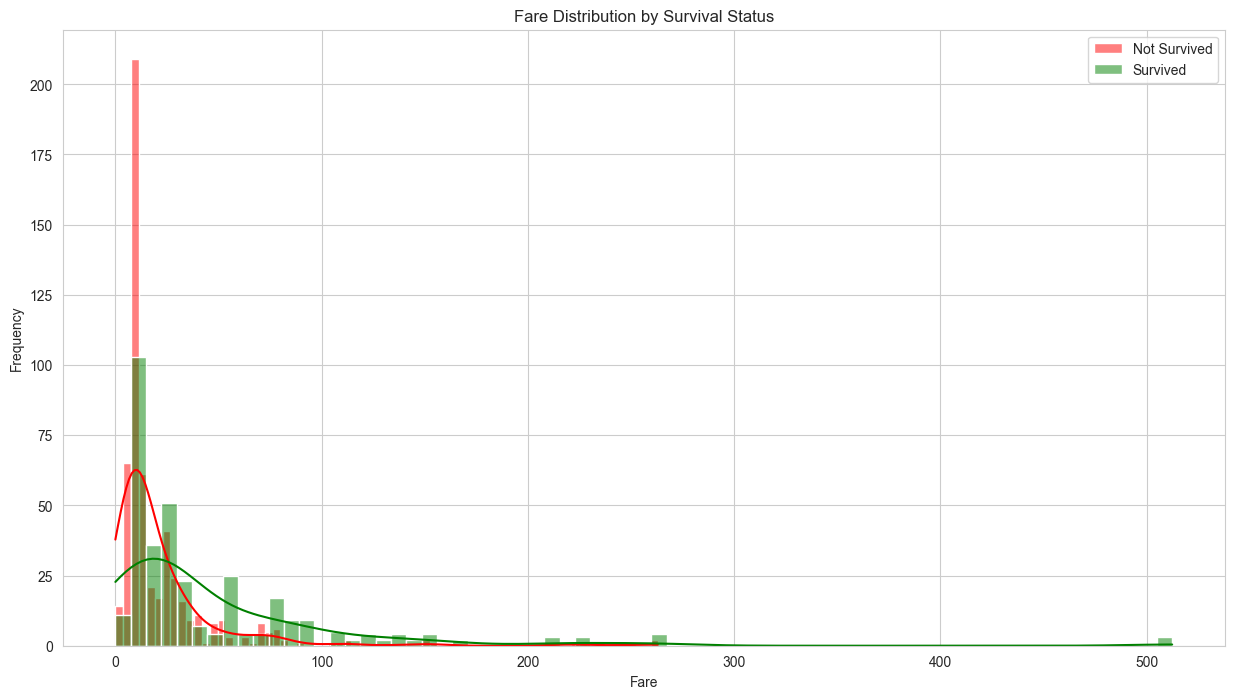

In [19]:
plt.figure(figsize=(15,8))
sns.histplot(df[df['Survived']==0]['Fare'].dropna(), bins=69, kde=True, color='red', label='Not Survived')
sns.histplot(df[df['Survived']==1]['Fare'].dropna(), bins=69, kde=True, color='green', label='Survived')
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

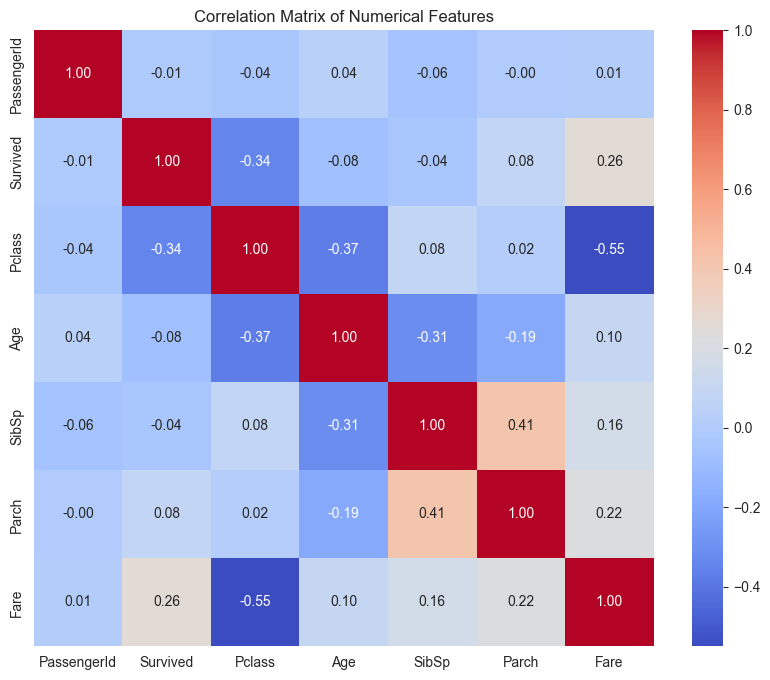

In [20]:
plt.figure(figsize=(10, 8))
numerical_cols = df.select_dtypes(include=np.number).columns
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [21]:
df_processed = df.copy()


In [22]:
print("\n3.1 Handling Missing Values:")
# Drop 'Cabin' due to too many missing values
print("Before dropping 'Cabin':", df_processed.shape)


3.1 Handling Missing Values:
Before dropping 'Cabin': (891, 12)


In [23]:
df_processed.drop('Cabin', axis=1, inplace=True)
print("After dropping 'Cabin':", df_processed.shape)

After dropping 'Cabin': (891, 11)


In [24]:
df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
print("Missing values in 'Age' after imputation:", df_processed['Age'].isnull().sum())

Missing values in 'Age' after imputation: 0


In [25]:
most_frequent_embarked = df_processed['Embarked'].mode()[0]
df_processed['Embarked'].fillna(most_frequent_embarked, inplace=True)
print("Missing values in 'Embarked' after imputation:", df_processed['Embarked'].isnull().sum())

Missing values in 'Embarked' after imputation: 0


In [26]:
print("\nMissing values after preprocessing step:")
print(df_processed.isnull().sum())


Missing values after preprocessing step:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [27]:
df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1

In [28]:
df_processed['IsAlone'] = 0
df_processed.loc[df_processed['FamilySize'] == 1, 'IsAlone'] = 1

In [29]:
df_processed['Title'] = df_processed['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [30]:
print(df_processed['Title'].head())

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object


In [31]:
title_mapping = {
    "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master",
    "Dr": "Rare", "Rev": "Rare", "Col": "Rare", "Major": "Rare", "Mlle": "Rare",
    "Countess": "Rare", "Ms": "Rare", "Lady": "Rare", "Jonkheer": "Rare",
    "Don": "Rare", "Dona": "Rare", "Mme": "Rare", "Capt": "Rare", "Sir": "Rare"
}
df_processed['Title'] = df_processed['Title'].map(title_mapping)

In [32]:
print("\nValue counts for new 'Title' feature:")
print(df_processed['Title'].value_counts())


Value counts for new 'Title' feature:
Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       26
Name: count, dtype: int64


In [33]:
df_processed.drop(['Name', 'Ticket', 'PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)
print("\nDataFrame after dropping irrelevant features:")
print(df_processed.head())


DataFrame after dropping irrelevant features:
   Survived  Pclass     Sex   Age     Fare Embarked  FamilySize  IsAlone Title
0         0       3    male  22.0   7.2500        S           2        0    Mr
1         1       1  female  38.0  71.2833        C           2        0   Mrs
2         1       3  female  26.0   7.9250        S           1        1  Miss
3         1       1  female  35.0  53.1000        S           2        0   Mrs
4         0       3    male  35.0   8.0500        S           1        1    Mr


In [34]:
categorical_cols = ['Sex', 'Embarked', 'Pclass', 'Title']

In [35]:
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

In [36]:
print("\nDataFrame after one-hot encoding:")
print(df_processed.head())
print("\nShape after one-hot encoding:", df_processed.shape)


DataFrame after one-hot encoding:
   Survived   Age     Fare  FamilySize  IsAlone  Sex_male  Embarked_Q  \
0         0  22.0   7.2500           2        0      True       False   
1         1  38.0  71.2833           2        0     False       False   
2         1  26.0   7.9250           1        1     False       False   
3         1  35.0  53.1000           2        0     False       False   
4         0  35.0   8.0500           1        1      True       False   

   Embarked_S  Pclass_2  Pclass_3  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0        True     False      True       False      True      False       False  
1       False     False     False       False     False       True       False  
2        True     False      True        True     False      False       False  
3        True     False     False       False     False       True       False  
4        True     False      True       False      True      False       False  

Shape after one-hot encoding: (891, 14)

In [37]:
numerical_cols_to_scale = ['Age', 'Fare', 'FamilySize']

In [38]:
scaler = StandardScaler()

In [39]:
df_processed[numerical_cols_to_scale] = scaler.fit_transform(df_processed[numerical_cols_to_scale])


In [40]:
print("\nDataFrame after numerical feature scaling:")
print(df_processed.head())


DataFrame after numerical feature scaling:
   Survived       Age      Fare  FamilySize  IsAlone  Sex_male  Embarked_Q  \
0         0 -0.565736 -0.502445    0.059160        0      True       False   
1         1  0.663861  0.786845    0.059160        0     False       False   
2         1 -0.258337 -0.488854   -0.560975        1     False       False   
3         1  0.433312  0.420730    0.059160        0     False       False   
4         0  0.433312 -0.486337   -0.560975        1      True       False   

   Embarked_S  Pclass_2  Pclass_3  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0        True     False      True       False      True      False       False  
1       False     False     False       False     False       True       False  
2        True     False      True        True     False      False       False  
3        True     False     False       False     False       True       False  
4        True     False      True       False      True      False       False  


In [41]:
X = df_processed.drop('Survived', axis=1)
y = df_processed['Survived']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (712, 13), (712,)
Testing set shape: (179, 13), (179,)


In [44]:
model = LogisticRegression(random_state=42)

In [45]:
print("Training the Logistic Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")

Training the Logistic Regression model...
Model training complete.


In [46]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.8212


In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[98 12]
 [20 49]]


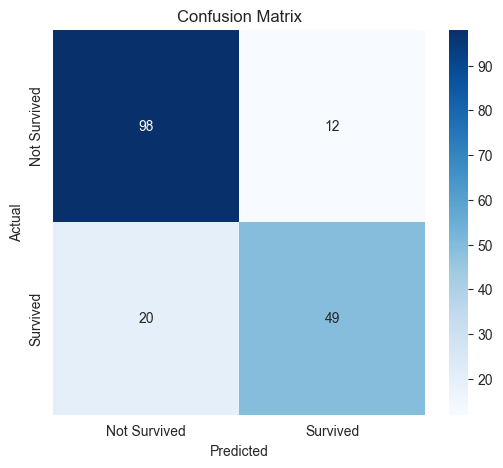

In [49]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [50]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       110
           1       0.80      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [51]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

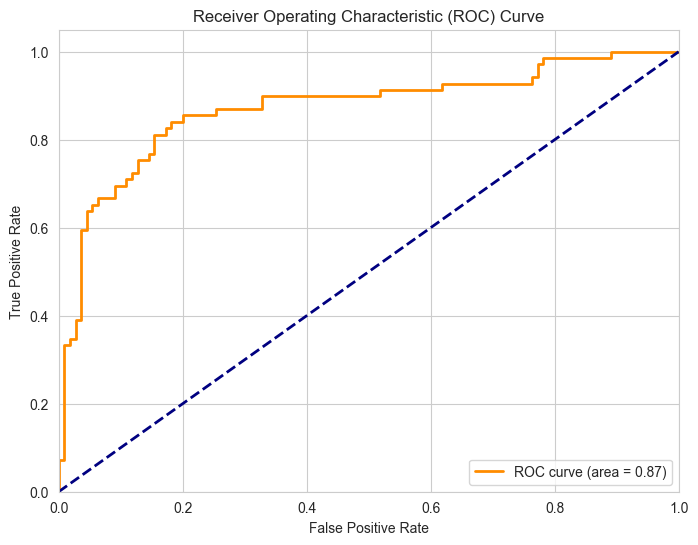

AUC Score: 0.8713
--------------------------------------------------


In [52]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC Score: {roc_auc:.4f}")
print("-" * 50)